In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
student_df = pd.read_csv("Student_Performance.csv")
student_df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
print(student_df.shape)
student_df.describe()

(10000, 6)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
student_df['Extracurricular Activities'] = student_df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
student_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
student_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
student_df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

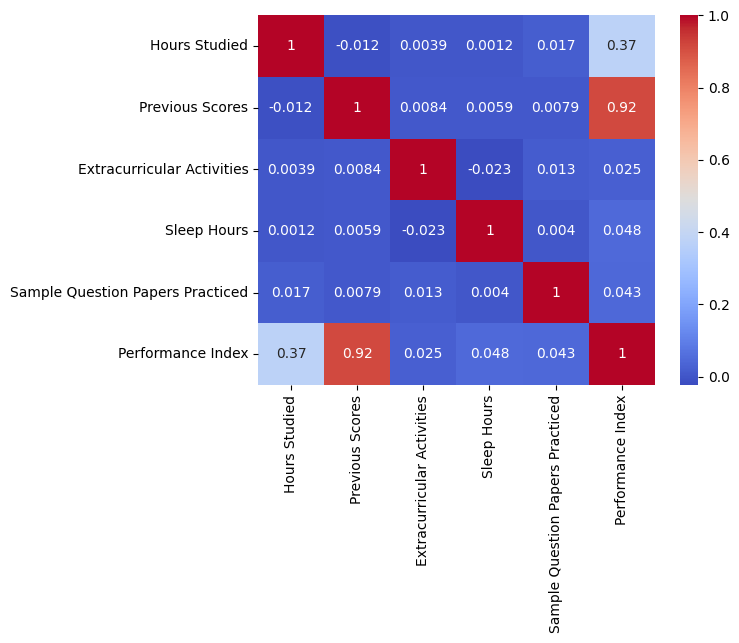

In [8]:
import seaborn as sns
corr_matrix = student_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show

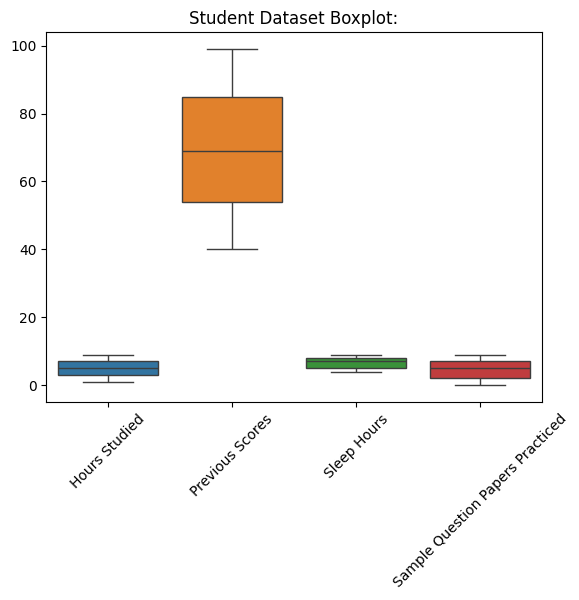

In [45]:
sns.boxplot(data=student_df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
plt.xticks(rotation=45)
plt.title("Student Dataset Boxplot:")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = student_df.drop('Performance Index', axis=1)
y = student_df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.006455,-1.183844,-0.989307,0.269888,0.134041
1,-1.149747,-1.241506,1.010808,0.269888,0.483562
2,-1.149747,0.661318,-0.989307,0.269888,-0.914520
3,-1.149747,-1.356828,-0.989307,-0.318906,-1.264041
4,1.162658,-1.299167,-0.989307,1.447477,-1.613561


In [11]:
X_test_scaled_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.006455,-0.030618,-0.989307,0.858683,-0.914520
1,-1.149747,-1.356828,1.010808,-1.496494,1.182603
2,0.777257,-0.780215,1.010808,0.269888,0.134041
3,0.391856,-1.587474,1.010808,0.858683,0.134041
4,0.777257,-0.953199,-0.989307,-1.496494,0.483562


Linear Regression Evaluation:
Mean Squared Error: 4.082628398521854
R2: 0.9889832909573145


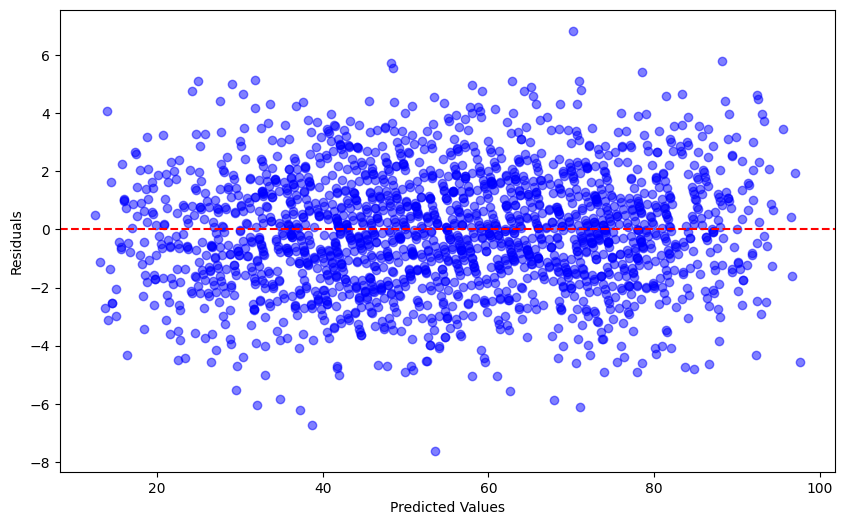

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Linear = LinearRegression()
Linear.fit(X_train, y_train)
y_pred = Linear.predict(X_test)

print("Linear Regression Evaluation:")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_pred))

res = y_test - y_pred
plt.figure (figsize=(10, 6))
plt.scatter(y_pred, res, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

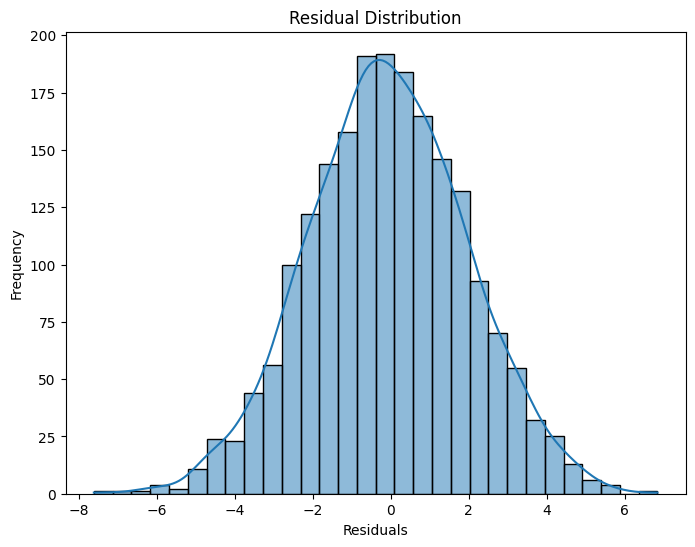

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(res, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [41]:
samples, features = X_train_scaled.shape
w = np.zeros(features)
bias = 0
lr = 0.01
epochs = 1000

for i in range(epochs):
    y_pred = np.dot(X_train_scaled, w) + bias
    error = y_pred - y_train
    dw = (1 / samples) * np.dot(X_train_scaled.T, error)
    db = (1 / samples) * np.sum(error)
    w = w - lr * dw
    bias = bias - lr * db

print("Gradient Descent Evaluation:")
y_test_pred = np.dot(X_test_scaled, w) + bias
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_test_pred))

Gradient Descent Evaluation:
Mean Squared Error: 4.082454883009033
R2: 0.9889837591777187


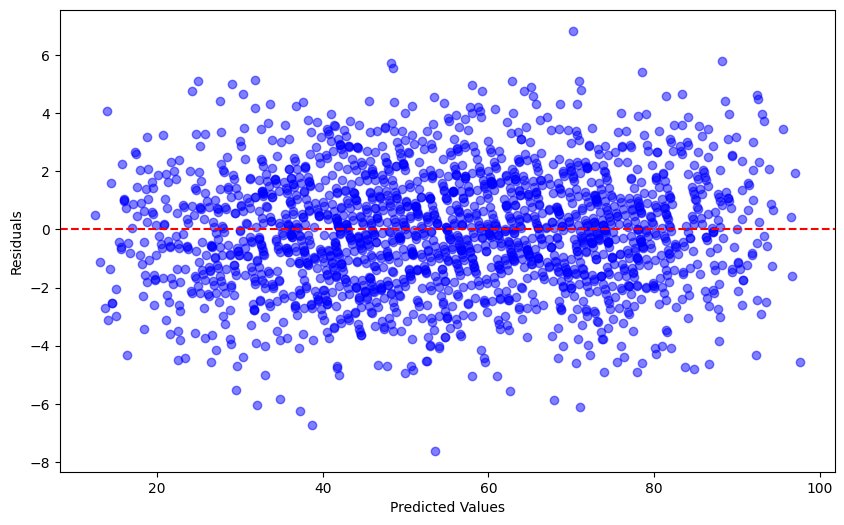

In [30]:
y_pred_gd = np.dot(X_test_scaled, w) + bias
res_gd = y_test - y_pred_gd
plt.figure (figsize=(10, 6))
plt.scatter(y_pred_gd, res_gd, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [23]:
print("y_test:", y_test.shape, "y_pred:", y_pred.shape)

y_test: (2000,) y_pred: (2000,)


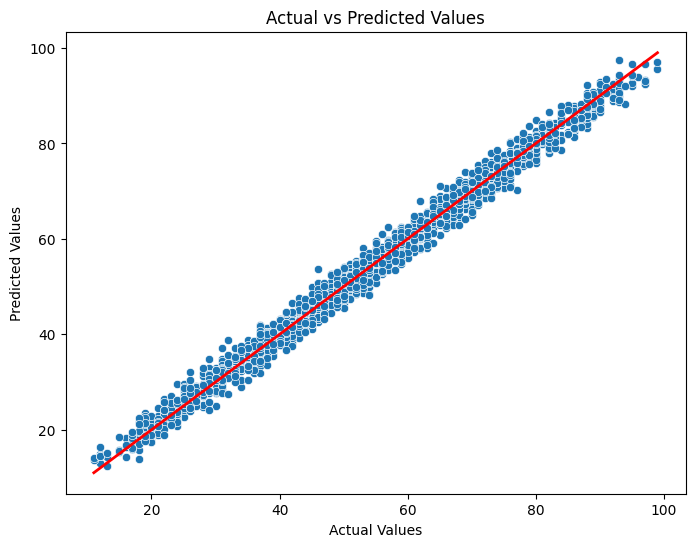

In [ ]:
y_pred = np.dot(X_test_scaled, w) + bias
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()